In [ ]:
# Imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion and Understanding

In [ ]:
# Read data
df_srx = pd.read_excel("df_srx_new.xlsx")

In [ ]:
df_srx.isnull().sum()

Unnamed: 0                9999
PSF                       2303
Property Name             2296
Bathrooms                 3080
Tenure                    2411
Model                     3778
No. of Units              2643
District                  2296
Take Over                 2296
Property Type             2296
Lease Term                2296
Room Type                 2296
Address                   2296
Available from            6941
Size                      2296
Date Listed               2296
Floor Level               9407
Utility Amount            9987
Bedrooms                  3312
Developer                 2772
Built Year                2967
Furnish                   6430
Asking                    2302
HDB Town                  9999
TOP                       9840
Bus Stops                 3322
Primary Schools           2431
Groceries & Supermarts    2303
Shopping Malls            2340
Trains (MRT & LRT)        2345
dtype: int64

In [ ]:
df_srx.dtypes

Unnamed: 0                float64
PSF                        object
Property Name              object
Bathrooms                 float64
Tenure                     object
Model                      object
No. of Units              float64
District                   object
Take Over                  object
Property Type              object
Lease Term                 object
Room Type                  object
Address                    object
Available from             object
Size                       object
Date Listed               float64
Floor Level                object
Utility Amount             object
Bedrooms                   object
Developer                  object
Built Year                float64
Furnish                    object
Asking                     object
HDB Town                  float64
TOP                       float64
Bus Stops                  object
Primary Schools            object
Groceries & Supermarts     object
Shopping Malls             object
Trains (MRT & 

# Data Cleaning

In [ ]:
# Remove completely empty rows
print(f'Original: {len(df_srx)}')
df_srx = df_srx.dropna(how="all")
print(f'df_srx: {len(df_srx)}')

Original: 9999
df_srx: 7703


In [ ]:
df_srx.isnull().sum()

Unnamed: 0                7703
PSF                          7
Property Name                0
Bathrooms                  784
Tenure                     115
Model                     1482
No. of Units               347
District                     0
Take Over                    0
Property Type                0
Lease Term                   0
Room Type                    0
Address                      0
Available from            4645
Size                         0
Date Listed                  0
Floor Level               7111
Utility Amount            7691
Bedrooms                  1016
Developer                  476
Built Year                 671
Furnish                   4134
Asking                       6
HDB Town                  7703
TOP                       7544
Bus Stops                 1026
Primary Schools            135
Groceries & Supermarts       7
Shopping Malls              44
Trains (MRT & LRT)          49
dtype: int64

In [ ]:
# Remove duplicates
df_srx = df_srx.drop_duplicates()

print(f'df_srx: {len(df_srx)}')

df_srx: 7703


In [ ]:
df_srx = df_srx.replace(to_replace=r'\t', value='', regex=True)
df_srx['Available from'] = df_srx['Available from'].replace(to_replace=[np.nan,',Now'], value=datetime.now().date(), regex=True)
df_srx['Available from'] = df_srx['Available from'].apply(lambda x: pd.to_datetime(x).date())
#Keep Available From before today
df_srx = df_srx[df_srx['Available from'] <= datetime.now().date()]
print(f'df_srx: {len(df_srx)}')

df_srx: 6905


In [ ]:
#Has property type
df_srx = df_srx[pd.notnull(df_srx['Property Type'])]
print(f'df_srx: {len(df_srx)}')

df_srx: 6905


In [ ]:
# Remove 3 empty date listed rows
df_srx = df_srx[df_srx['Date Listed'].notna()]

In [ ]:
# Remove unnecessary columns 
df_srx = df_srx.drop(['Utility Amount', 'Available from', 'PSF', 'TOP', 'Floor Level', 'Furnish', 'Take Over', 'Bus Stops'], axis=1)

**Tenure**

In [ ]:
df_srx["Tenure"].value_counts()

LEASEHOLD/99 years           3801
FREEHOLD                     2561
999 years                     196
LEASEHOLD/103 years           100
110 Years from 01/11/2017      66
929 Years from 01/01/1953      15
956 Years from 27/05/1928      14
100 Years from 01/02/1986      10
LEASEHOLD/60 years              8
947 Years from 15/05/1937       8
Freehold                        4
N.A                             2
99 Years from 07/03/2018        1
99 Years from 28/08/2013        1
947 Years from 05/10/1934       1
998 Years from 12/10/1885       1
99 Years from 22/03/2012        1
946 Years from 23/06/1938       1
99 Years from 14/08/2018        1
103 Years from 01/10/2010       1
Name: Tenure, dtype: int64

In [ ]:
df_srx["Tenure"] = df_srx["Tenure"].replace(np.nan, 99)
df_srx["Tenure"] = df_srx["Tenure"].replace('N.A', 99)

In [ ]:
df_srx["Tenure"] = df_srx["Tenure"].apply(lambda x: str(x).lower().replace('leasehold/',''))
df_srx["Tenure"] = df_srx["Tenure"].apply(lambda x: re.sub('years.*','', x))
df_srx["Tenure"] = df_srx["Tenure"].apply(lambda x: 999 if x.find("freehold") > -1 else int(x))

In [ ]:
df_srx["Tenure"].value_counts()

99     3919
999    2761
103     101
110      66
929      15
956      14
100      10
947       9
60        8
998       1
946       1
Name: Tenure, dtype: int64

In [ ]:
# Or only two categories: Leasehold and freehold
# df_srx["Tenure"] = df_srx["Tenure"].replace(np.nan, "Leasehold")
# df_srx["Tenure"] = df_srx["Tenure"].apply(lambda x: "Freehold" if x.find("freehold") > -1 or x.find("999") > -1 else "Non-freehold")

**District**

In [ ]:
df_srx["District"].value_counts()

D9 - Orchard / River Valley                          946
D10 - Tanglin / Holland / Bukit Timah                880
D14 - Eunos / Geylang / Paya Lebar                   487
D19 - Hougang / Punggol / Sengkang                   382
D15 - East Coast / Marine Parade                     371
D1 - Boat Quay / Raffles Place / Marina              323
D3 - Alexandra / Commonwealth                        310
D18 - Pasir Ris / Tampines                           295
D5 - Buona Vista / West Coast / Clementi New Town    279
D20 - Ang Mo Kio / Bishan / Thomson                  251
D21 - Clementi Park / Upper Bukit Timah              244
D11 - Newton / Novena                                240
D23 - Dairy Farm / Bukit Panjang / Choa Chu Kang     210
D22 - Boon Lay / Jurong / Tuas                       188
D16 - Bedok / Upper East Coast                       186
D13 - Macpherson / Potong Pasir                      180
D12 - Balestier / Toa Payoh                          171
D4 - Sentosa / Harbourfront    

In [ ]:
null_districts_with_towns = df_srx[df_srx['District'].isna()]['HDB Town']
unique_towns = null_districts_with_towns.unique()
unique_towns

array([], dtype=float64)

In [ ]:
df_srx["District"] = df_srx["District"].fillna("NULL")
for town in unique_towns:
    avail_districts = df_srx["District"][df_srx["District"].str.contains(town)]
    if avail_districts.empty:
      pass
    else:
      df_srx.loc[df_srx["HDB Town"] == town, ["District"]] = avail_districts.iloc[0]

In [ ]:
df_srx.loc[df_srx["District"]=="NULL"]["HDB Town"].unique()

array([], dtype=float64)

In [ ]:
# Manually replace NaN values in District column based on info from external resources
df_srx.loc[df_srx['HDB Town'] == 'Jurong West', ["District"]] = 'D22'
df_srx.loc[df_srx['HDB Town'] == 'Jurong East', ["District"]] = 'D22'
df_srx.loc[df_srx['HDB Town'] == 'Bukit Batok', ["District"]] = 'D21'
df_srx.loc[df_srx['HDB Town'] == 'Kallang/Whampoa', ["District"]] = 'D11'
df_srx.loc[df_srx['HDB Town'] == 'Queenstown', ["District"]] = 'D3'
df_srx.loc[df_srx['HDB Town'] == 'Bukit Merah', ["District"]] = 'D3'
df_srx.loc[df_srx['HDB Town'] == 'Central Area', ["District"]] = 'D1'

In [ ]:
df_srx["District"].value_counts()

D9 - Orchard / River Valley                          946
D10 - Tanglin / Holland / Bukit Timah                880
D14 - Eunos / Geylang / Paya Lebar                   487
D19 - Hougang / Punggol / Sengkang                   382
D15 - East Coast / Marine Parade                     371
D1 - Boat Quay / Raffles Place / Marina              323
D3 - Alexandra / Commonwealth                        310
D18 - Pasir Ris / Tampines                           295
D5 - Buona Vista / West Coast / Clementi New Town    279
D20 - Ang Mo Kio / Bishan / Thomson                  251
D21 - Clementi Park / Upper Bukit Timah              244
D11 - Newton / Novena                                240
D23 - Dairy Farm / Bukit Panjang / Choa Chu Kang     210
D22 - Boon Lay / Jurong / Tuas                       188
D16 - Bedok / Upper East Coast                       186
D13 - Macpherson / Potong Pasir                      180
D12 - Balestier / Toa Payoh                          171
D4 - Sentosa / Harbourfront    

In [ ]:
df_srx["District"] = df_srx["District"].apply(lambda x: re.sub(' -.*','',str(x)))

In [ ]:
df_srx["District"].value_counts()

D9     946
D10    880
D14    487
D19    382
D15    371
D1     323
D3     310
D18    295
D5     279
D20    251
D21    244
D11    240
D23    210
D22    188
D16    186
D13    180
D12    171
D4     168
D2     167
D27    125
D8     116
D17    115
D7      94
D25     85
D28     67
D26     19
D6       6
Name: District, dtype: int64

In [ ]:
# Remove unnecessary HDB Town column 
df_srx = df_srx.drop(['HDB Town'], axis=1)

**Size**

In [ ]:
df_srx["Size"].value_counts()

200 sqft (Built-up)      185
150 sqft (Built-up)      176
100 sqft (Built-up)      149
764 sqft (Built-up)      104
689 sqft (Built-up)      104
                        ... 
123 sqft (Built-up)        1
2,175 sqft (Built-up)      1
3,520 sqft (Built-up)      1
1,527 sqft (Built-up)      1
88 sqft (Built-up)         1
Name: Size, Length: 832, dtype: int64

In [ ]:
df_srx[df_srx["Size"].isnull()]

,Unnamed: 0,Property Name,Bathrooms,Tenure,Model,No. of Units,District,Property Type,Lease Term,Room Type,...,Size,Date Listed,Bedrooms,Developer,Built Year,Asking,Primary Schools,Groceries & Supermarts,Shopping Malls,Trains (MRT & LRT)


In [ ]:
# 1 sqm = 10.764 sqft
df_srx["Size"] = df_srx["Size"].fillna(0)
df_srx["Size"] = df_srx["Size"].apply(lambda x: str(x).replace(',', ''))
df_srx["Size"] = df_srx["Size"].apply(lambda x: int(x.split(' ')[0]) if x.find('sqft') > -1 else int(x.split(' ')[0])*10.764)

In [ ]:
df_srx['Property Type'].value_counts()

Condominium    3982
Apartment      2923
Name: Property Type, dtype: int64

In [ ]:
pd.cut(df_srx["Size"], np.arange(0, 90000, 10000)).value_counts()

(0, 10000]        6904
(10000, 20000]       0
(20000, 30000]       0
(30000, 40000]       0
(40000, 50000]       0
(50000, 60000]       0
(60000, 70000]       0
(70000, 80000]       0
Name: Size, dtype: int64

In [ ]:
big = df_srx[df_srx["Size"] > 20000]
big

,Unnamed: 0,Property Name,Bathrooms,Tenure,Model,No. of Units,District,Property Type,Lease Term,Room Type,...,Size,Date Listed,Bedrooms,Developer,Built Year,Asking,Primary Schools,Groceries & Supermarts,Shopping Malls,Trains (MRT & LRT)
9729,NaN,Tenet,2.0,99,Executive Condominium,618.0,D18,Condominium,Flexible,Entire Unit,...,1121997,1.678800e+09,3,TQS Development Pte Ltd,NaN,$893,"Elias Park Primary,0.74 km;Park View Primary,1...","NTUC Fairprice (Whitesands),0.92 km;Sheng Sion...","White Sands,0.92 km;Elias Mall,1.14 km;Pasir R...","TAMPINES NORTH MRT DUE 2029,CR6;PASIR RIS MRT,..."


In [ ]:
# Remove outlier of size 70,000+ sqft
df_srx = df_srx[df_srx["Size"] < 30000]

**Bedrooms**

In [ ]:
df_srx["Bedrooms"].value_counts()

2         1695
3         1536
1         1344
4          615
Studio     181
3+1        159
4+1        120
1+1        102
2+1         91
5           76
6           13
5+1          9
4+2          3
Name: Bedrooms, dtype: int64

In [ ]:
df_srx["Bedrooms"] = df_srx["Bedrooms"].fillna(0)
df_srx.loc[df_srx["Bedrooms"]=="Studio"] = 1
df_srx.loc[df_srx["Bedrooms"]=="10+"] = 10
df_srx["Bedrooms"] = df_srx["Bedrooms"].astype('str').apply(lambda x: int(x[0])+1 if x.find("+") > -1 else int(x) if len(x)<3 else 0)

In [ ]:
df_srx["Bedrooms"].value_counts()

2    1797
3    1627
1    1525
0     960
4     774
5     199
6      22
Name: Bedrooms, dtype: int64

**Bathrooms**

In [ ]:
df_srx["Bathrooms"].value_counts()

1.0    2165
2.0    2160
3.0    1190
4.0     465
5.0     150
6.0      32
7.0       4
Name: Bathrooms, dtype: int64

In [ ]:
df_srx["Bathrooms"] = df_srx["Bathrooms"].fillna(0)
df_srx.loc[df_srx["Bathrooms"] > 10] = 0
df_srx["Bathrooms"] = df_srx["Bathrooms"].astype(int)

In [ ]:
df_srx["Bathrooms"].value_counts()

1    2165
2    2160
3    1190
0     738
4     465
5     150
6      32
7       4
Name: Bathrooms, dtype: int64

**Furnish**

In [ ]:
# df_srx["Furnish"].value_counts()

In [ ]:
# df_srx["Furnish"] = df_srx["Furnish"].apply(lambda x: "Unknown" if str(x) in ("0", "1", "10", "nan") else str(x))

In [ ]:
# df_srx["Furnish"].value_counts()

**Property Type**

In [ ]:
df_srx['Property Type'].unique()

array(['Condominium', 'Apartment', 1], dtype=object)

In [ ]:
df_srx['Property'] = df_srx['Property Type'].apply(lambda x: 'HDB' if 'HDB' in str(x) else 'Condominium' if 'Condo' in str(x) else np.nan)

In [ ]:
df_srx['Property'].value_counts()

Condominium    3873
Name: Property, dtype: int64

In [ ]:
#Only keep condo & hdb
df_srx = df_srx[pd.notnull(df_srx['Property'])]

**Asking**

In [ ]:
def findPrice(x):
    if str(x) == 'nan':
        return np.nan
    price = re.findall(r'\d+\,\d+',x)
    if len(price) == 0:
        return np.nan
    else:
        return int(re.sub(',','',price[0]))

In [ ]:
df_srx['Asking'] = df_srx['Asking'].apply(findPrice)

In [ ]:
#Remove those have same posting info but the price are different; take an average
srx = df_srx.groupby([ 'Property Name',  'Address']).aggregate({'Asking':'mean'}).reset_index()
df_srx = pd.merge(df_srx.drop(['Asking'], axis=1), srx.drop_duplicates(), on = [ 'Property Name',  'Address'], how="inner")

In [ ]:
df_srx.shape

(3873, 22)

**Built Year**

<Axes: xlabel='Property', ylabel='Built Year'>

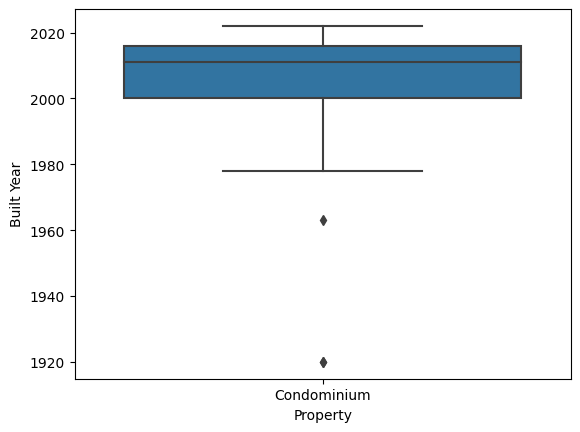

In [ ]:
df_srx['Built Year'] = df_srx['Built Year'].astype(float)
sns.boxplot(y="Built Year", x="Property", data=df_srx)

In [ ]:
df_srx['Built Year']

0       2022.0
1       2022.0
2       2022.0
3       2022.0
4       2022.0
         ...  
3868    1994.0
3869    2014.0
3870    1997.0
3871    2011.0
3872    2013.0
Name: Built Year, Length: 3873, dtype: float64

In [ ]:
#Imputation HDB nan as mean
# print(df_srx['Built Year'][df_srx['Property'] == 'HDB'].describe())
# df_srx['Built Year'][(df_srx['Property'] == 'HDB') & pd.isnull(df_srx['Built Year'])] = 1992

In [ ]:
#Imputation Condo nan as mean
print(df_srx['Built Year'][df_srx['Property'] == 'Condominium'].describe())
df_srx['Built Year'][(df_srx['Property'] == 'Condominium') & pd.isnull(df_srx['Built Year'])]  = 2008

count    3637.000000
mean     2008.104207
std        10.605117
min      1920.000000
25%      2000.000000
50%      2011.000000
75%      2016.000000
max      2022.000000
Name: Built Year, dtype: float64


In [ ]:
df_srx['Built Year'] = df_srx['Built Year'].astype(int)

**Primary Schools, Groceries & Supermarts, Shopping Malls**

In [ ]:
def findKM(x):
    if str(x) == 'nan':
        return np.nan
    return min([float(s) for s in re.findall(r'\d+\.\d+', x)])

In [ ]:
df_srx['Shopping Malls'] = df_srx['Shopping Malls'].apply(findKM)
df_srx['Primary Schools'] = df_srx['Primary Schools'].apply(findKM)
df_srx['Groceries & Supermarts'] = df_srx['Groceries & Supermarts'].apply(findKM)

In [ ]:
#Imputation nan as 1km
df_srx['Primary Schools'][pd.isnull(df_srx['Primary Schools'])] = 1
df_srx['Shopping Malls'][pd.isnull(df_srx['Shopping Malls'])] = 1
df_srx['Groceries & Supermarts'][pd.isnull(df_srx['Groceries & Supermarts'])] = 1

**Date listed**

In [ ]:
df_srx['Date Listed'] = df_srx['Date Listed'].apply(lambda x: datetime.fromtimestamp(x))

**MRT**

In [ ]:
def findFirstMRT(x):
  if str(x) == "nan":
    return ""
  mrts = x.split(";")
  final = []
  for mrt in mrts:
    if "DUE" not in mrt:
      final.append(mrt)
  return final[0] if len(final) !=0 else ""

In [ ]:
df_srx['Trains (MRT & LRT)'] = df_srx['Trains (MRT & LRT)'].apply(findFirstMRT)

**No. of units**

In [ ]:
df_srx.columns

Index(['Unnamed: 0', 'Property Name', 'Bathrooms', 'Tenure', 'Model',
       'No. of Units', 'District', 'Property Type', 'Lease Term', 'Room Type',
       'Address', 'Size', 'Date Listed', 'Bedrooms', 'Developer', 'Built Year',
       'Primary Schools', 'Groceries & Supermarts', 'Shopping Malls',
       'Trains (MRT & LRT)', 'Property', 'Asking'],
      dtype='object')

In [ ]:
df_srx['Neighborhood'] = df_srx['No. of Units'].apply(lambda x: "Small" if x<=450 else "Big")

**Imputation - Bathrooms**

In [ ]:
df_srx.isnull().sum()

Unnamed: 0                3873
Property Name                0
Bathrooms                    0
Tenure                       0
Model                      656
No. of Units               219
District                     0
Property Type                0
Lease Term                   0
Room Type                    0
Address                      0
Size                         0
Date Listed                  0
Bedrooms                     0
Developer                  142
Built Year                   0
Primary Schools              0
Groceries & Supermarts       0
Shopping Malls               0
Trains (MRT & LRT)           0
Property                     0
Asking                       6
Neighborhood                 0
dtype: int64

In [ ]:
# Find max size of flats that require bathroom imputation
df_srx[df_srx["Bathrooms"]==0]["Size"].max()

4000

In [ ]:
df_srx["Bathrooms"] = df_srx["Bathrooms"].replace(0, np.nan)

In [ ]:
total_bins = pd.cut(df_srx["Size"], np.arange(0, 30000, 400)) 
bath = df_srx.groupby(pd.cut(df_srx["Size"], np.arange(0, 12000, 400)) ).median()["Bathrooms"]

In [ ]:
df_srx["Bathrooms"] = df_srx["Bathrooms"].fillna(total_bins.replace(bath))

In [ ]:
df_srx["Bathrooms"].value_counts()

1.0    1301
2.0    1205
3.0     894
4.0     337
5.0     110
6.0      23
7.0       3
Name: Bathrooms, dtype: int64

**Imputation - Bedrooms**

In [ ]:
# Find max size of flats that require bedroom imputation
df_srx[df_srx["Bedrooms"]==0]["Size"].max()

2000

In [ ]:
df_srx["Bedrooms"] = df_srx["Bedrooms"].replace(0, np.nan)

In [ ]:
bed = df_srx.groupby(pd.cut(df_srx["Size"], np.arange(0, 13000, 400))).median()["Bedrooms"]
bed

Size
(0, 400]          1.0
(400, 800]        2.0
(800, 1200]       3.0
(1200, 1600]      3.0
(1600, 2000]      3.0
(2000, 2400]      4.0
(2400, 2800]      4.0
(2800, 3200]      4.0
(3200, 3600]      4.0
(3600, 4000]      4.0
(4000, 4400]      5.0
(4400, 4800]      5.0
(4800, 5200]      5.0
(5200, 5600]      5.0
(5600, 6000]      5.0
(6000, 6400]      5.0
(6400, 6800]      NaN
(6800, 7200]      5.0
(7200, 7600]      NaN
(7600, 8000]      4.0
(8000, 8400]      NaN
(8400, 8800]      5.5
(8800, 9200]      NaN
(9200, 9600]      NaN
(9600, 10000]     NaN
(10000, 10400]    NaN
(10400, 10800]    NaN
(10800, 11200]    NaN
(11200, 11600]    NaN
(11600, 12000]    NaN
(12000, 12400]    NaN
(12400, 12800]    NaN
Name: Bedrooms, dtype: float64

In [ ]:
df_srx["Bedrooms"] = df_srx["Bedrooms"].fillna(total_bins.replace(bed))

In [ ]:
df_srx["Bedrooms"].value_counts()

1.0    1124
3.0    1118
2.0     909
4.0     564
5.0     145
6.0      13
Name: Bedrooms, dtype: int64

**Imputation - Room Type**

In [ ]:
df_srx['Room Type'].value_counts()

Entire Unit    3241
Common          334
N.A             180
Master          118
Name: Room Type, dtype: int64

In [ ]:
df_srx['Room Type'] = df_srx['Room Type'].apply(lambda x: 'Entire Unit' if (x=='N.A')|(x==1)|(x==10)|(x==0) else x)

In [ ]:
df_srx['Room Type'].value_counts()

Entire Unit    3421
Common          334
Master          118
Name: Room Type, dtype: int64

**Imputation - Asking**

In [ ]:
# Find max size of flats that require asking price imputation
df_srx[pd.isnull(df_srx["Asking"])]["Size"].max()

200

In [ ]:
df_srx["Asking"] = df_srx["Asking"].replace(0, np.nan)

In [ ]:
asking = df_srx.groupby(pd.cut(df_srx["Size"], np.arange(0, 2400, 400))).median()["Asking"]
asking

Size
(0, 400]        2625.000000
(400, 800]      4849.377049
(800, 1200]     5000.000000
(1200, 1600]    6000.000000
(1600, 2000]    8611.000000
Name: Asking, dtype: float64

In [ ]:
df_srx["Asking"] = df_srx["Asking"].fillna(total_bins.replace(asking))

# Outlier Analysis

In [ ]:
df_srx.columns

Index(['Unnamed: 0', 'Property Name', 'Bathrooms', 'Tenure', 'Model',
       'No. of Units', 'District', 'Property Type', 'Lease Term', 'Room Type',
       'Address', 'Size', 'Date Listed', 'Bedrooms', 'Developer', 'Built Year',
       'Primary Schools', 'Groceries & Supermarts', 'Shopping Malls',
       'Trains (MRT & LRT)', 'Property', 'Asking', 'Neighborhood'],
      dtype='object')

In [ ]:
numerical_columns = ['Bedrooms','Bathrooms','Size', 'Built Year']

In [ ]:
for k,v in df_srx[numerical_columns].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_srx[numerical_columns])[0]
    print("%s has outliers percentage of %.2f%%" % (k, perc))

Bedrooms has outliers percentage of 0.34%
Bathrooms has outliers percentage of 0.67%
Size has outliers percentage of 7.93%
Built Year has outliers percentage of 0.08%


# Heatmap of correlation

<Axes: >

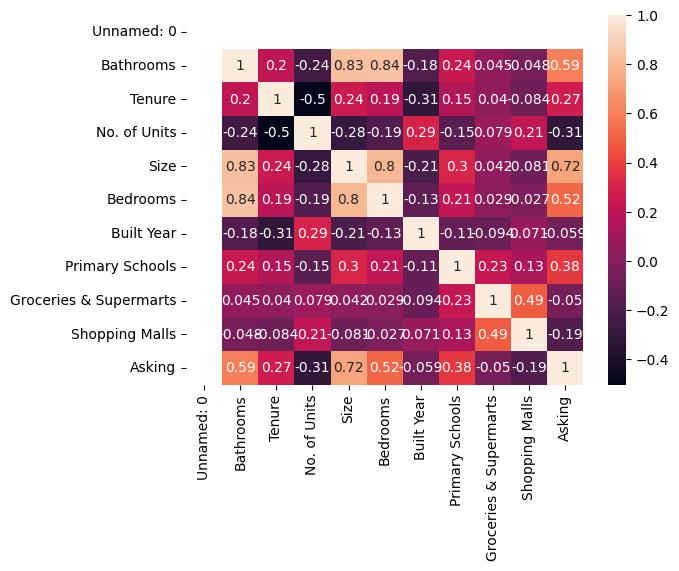

In [ ]:
sns.heatmap(df_srx.corr(), annot=True)

In [ ]:
df_srx.describe()

,Unnamed: 0,Bathrooms,Tenure,No. of Units,Size,Bedrooms,Built Year,Primary Schools,Groceries & Supermarts,Shopping Malls,Asking
count,0.0,3873.000000,3873.000000,3654.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000,3873.000000
mean,NaN,2.181771,393.151046,489.696223,1166.087013,2.415440,2008.097857,0.685877,0.543336,0.712375,7025.371442
std,NaN,1.118961,421.947208,319.610845,945.454009,1.174646,10.276874,0.368909,0.295149,0.448712,6284.795374
min,NaN,1.000000,99.000000,11.000000,1.000000,1.000000,1920.000000,0.060000,0.000000,0.000000,1000.000000
25%,NaN,1.000000,99.000000,231.000000,570.000000,1.000000,2000.000000,0.430000,0.320000,0.360000,3960.000000
50%,NaN,2.000000,99.000000,449.000000,969.000000,2.000000,2010.000000,0.620000,0.500000,0.620000,5233.333333
75%,NaN,3.000000,999.000000,696.000000,1442.000000,3.000000,2016.000000,0.840000,0.700000,0.950000,7612.437500
max,NaN,7.000000,999.000000,1715.000000,8514.000000,6.000000,2022.000000,1.890000,1.930000,1.980000,69000.000000


In [ ]:
df_srx.drop([ 'Model', 'Property Type'], axis=1, inplace=True)

# Split dataframe into HDB and Condo

In [ ]:
# #HDB
# df_srx_hdb = df_srx[df_srx['Property'] == 'HDB']
# df_srx_hdb = df_srx_hdb.drop(['Developer','Unnamed: 0'], axis=1)
# df_srx_hdb
# df_srx_hdb.to_csv("df_srx_HDB.csv")

In [ ]:
#Condo
df_srx_condo = df_srx[df_srx['Property'] == 'Condominium']
df_srx_condo = df_srx_condo[df_srx['Developer'].notna()]
df_srx_condo.isnull().sum()
df_srx_condo = df_srx_condo.drop(['Unnamed: 0'], axis=1)
df_srx_condo.to_csv("df_srx_Condo.csv")